daily number of customers


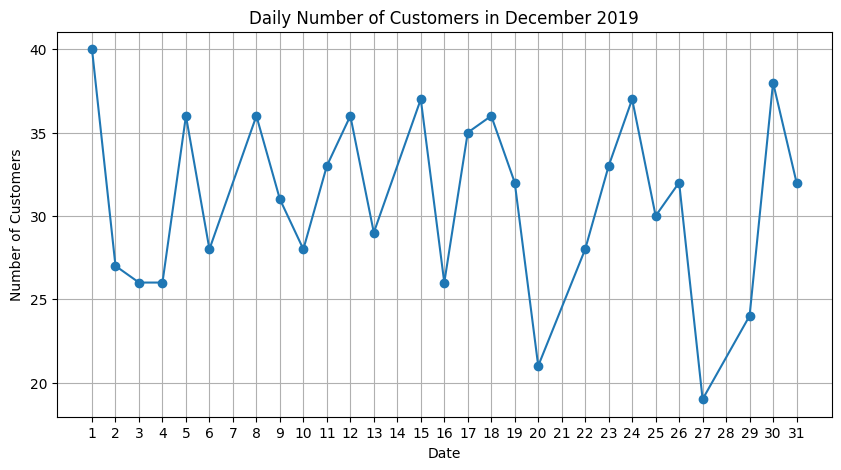

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

# Mengubah tipe data pada kolom 'order_date' menjadi datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Mengambil data pada bulan Desember 2019
df_december = df[(df['order_date'].dt.month == 12) & (df['order_date'].dt.year == 2019)]

# Menghitung jumlah unique customers tiap tanggal
daily_customers = df_december.groupby(df_december['order_date'].dt.day)['customer_id'].nunique()

# Membuat line chart
plt.figure(figsize=(10, 5))
plt.plot(daily_customers.index, daily_customers.values, marker='o', linestyle='-')
plt.title('Daily Number of Customers in December 2019')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.xticks(range(1, 32))
plt.grid(True)
plt.show()



**Case 1 B**

In [15]:
import pandas as pd

# Membaca file CSV
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

# Mengubah tipe data pada kolom 'order_date' menjadi datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Mengambil data pada bulan Desember 2019
df_december = df[(df['order_date'].dt.month == 12) & (df['order_date'].dt.year == 2019)]

# Menghitung jumlah quantity terjual tiap brand
brand_quantity = df_december.groupby('brand')['quantity'].sum().sort_values(ascending=False)

# Mengambil top 5 brand
top_5_brands = brand_quantity.head(5)

# Filter data hanya untuk top 5 brand
dataset_top5brand_dec = df_december[df_december['brand'].isin(top_5_brands.index)]

# Menampilkan top 5 brands
print("Top 5 Brands:")
print(top_5_brands)


Top 5 Brands:
brand
BRAND_S    2197
BRAND_P    2194
BRAND_R    1508
BRAND_C    1365
BRAND_A    1315
Name: quantity, dtype: int64


**Case 2**

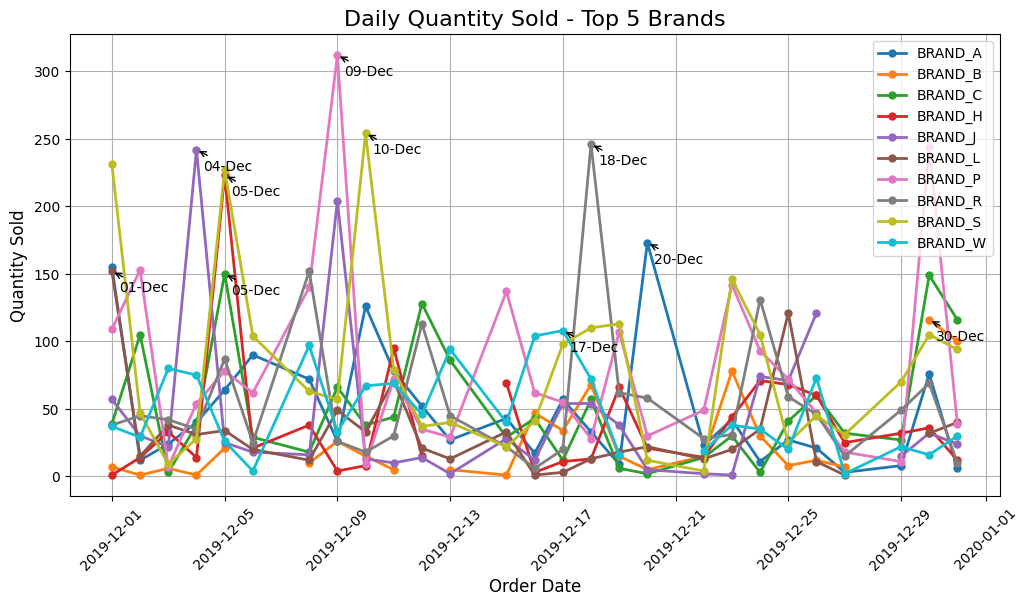

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Memuat dataset
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
data = pd.read_csv(url)

# Mengubah kolom order_date menjadi tipe data datetime
data['order_date'] = pd.to_datetime(data['order_date'])

# Mengambil data pada bulan Desember 2019
data_december_2019 = data[(data['order_date'].dt.month == 12) & (data['order_date'].dt.year == 2019)]

# Menghitung daily quantity terjual untuk top 5 brand
top5_brands = data_december_2019.groupby(['brand', 'order_date'])['quantity'].sum().unstack(level=0)
top5_brands.columns = top5_brands.columns.astype(str)

# Membuat multi-line chart
plt.figure(figsize=(12, 6))

for brand in top5_brands.columns:
    plt.plot(top5_brands.index, top5_brands[brand], marker='o', markersize=5, linewidth=2, label=brand)

# Mencari tanggal dengan quantity terjual terbesar
max_quantity_date = top5_brands.idxmax(axis=0)

# Menambahkan anotasi pada titik lonjakan
for brand in top5_brands.columns:
    plt.annotate(max_quantity_date[brand].strftime('%d-%b'), xy=(max_quantity_date[brand], top5_brands[brand][max_quantity_date[brand]]),
                 xytext=(5, -15), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='black'))

plt.title('Daily Quantity Sold - Top 5 Brands', fontsize=16)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()




**Case 3**

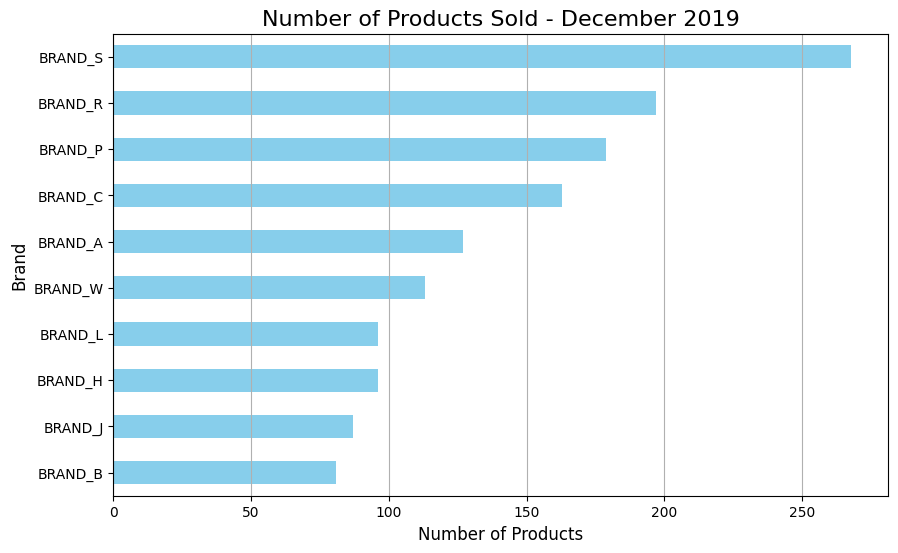

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Memuat dataset
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
data = pd.read_csv(url)

# Mengubah kolom order_date menjadi tipe data datetime
data['order_date'] = pd.to_datetime(data['order_date'])

# Mengambil data pada bulan Desember 2019
data_december_2019 = data[(data['order_date'].dt.month == 12) & (data['order_date'].dt.year == 2019)]

# Menghitung jumlah product yang terjual untuk setiap brand
brand_product_count = data_december_2019.groupby('brand')['product_id'].count().sort_values()

# Membuat bar chart
plt.figure(figsize=(10, 6))
brand_product_count.plot(kind='barh', color='skyblue')
plt.title('Number of Products Sold - December 2019', fontsize=16)
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.grid(axis='x')
plt.show()


**Case 4**

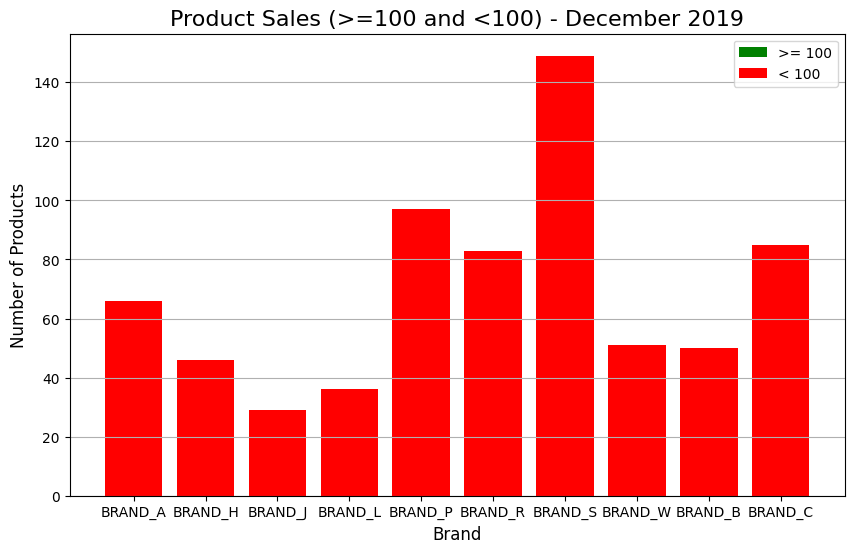

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Memuat dataset
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
data = pd.read_csv(url)

# Mengubah kolom order_date menjadi tipe data datetime
data['order_date'] = pd.to_datetime(data['order_date'])

# Mengambil data pada bulan Desember 2019
data_december_2019 = data[(data['order_date'].dt.month == 12) & (data['order_date'].dt.year == 2019)]

# Menghitung jumlah product yang terjual untuk setiap kategori
product_count = data_december_2019.groupby(['brand', 'product_id'])['quantity'].sum()
product_count = product_count.reset_index()

# Membagi data menjadi dua kategori: >= 100 dan < 100
above_100 = product_count[product_count['quantity'] >= 100]
below_100 = product_count[product_count['quantity'] < 100]

# Menghitung jumlah brand dalam setiap kategori
above_100_count = above_100.groupby('brand')['product_id'].count()
below_100_count = below_100.groupby('brand')['product_id'].count()

# Membuat stacked chart
plt.figure(figsize=(10, 6))
plt.bar(above_100_count.index, above_100_count, color='green', label='>= 100')
plt.bar(below_100_count.index, below_100_count, color='red', label='< 100')

plt.title('Product Sales (>=100 and <100) - December 2019', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.legend()
plt.grid(axis='y')
plt.show()


**Case 5 **

(0.0, 2000000.0)

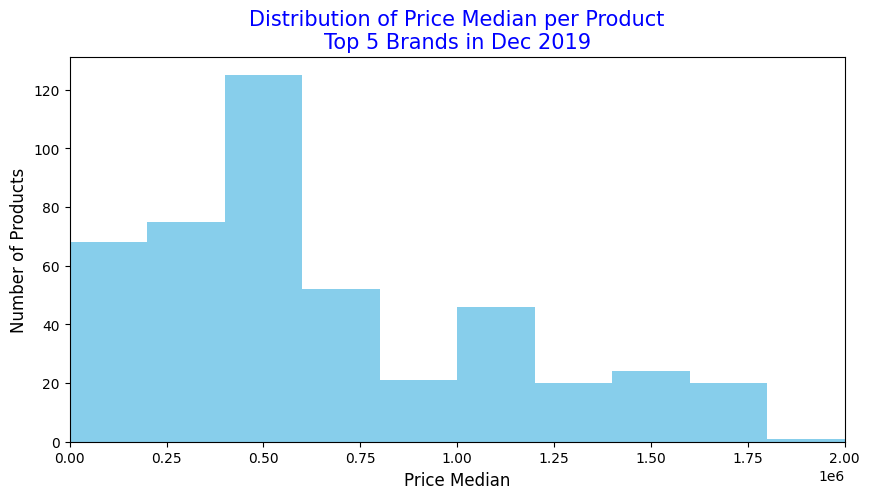

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Memuat dataset
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
data = pd.read_csv(url)

# Menghitung total penjualan (quantity * item_price) untuk setiap product_id
data['total_sales'] = data['quantity'] * data['item_price']

# Mengambil data untuk top 5 brand
top5_brands = data[data['brand'].isin(['Brand A', 'Brand B', 'Brand C', 'Brand D', 'Brand E'])]

# Menghitung median harga untuk tiap product_id
product_price_median = top5_brands.groupby('product_id')['total_sales'].median()

# Membuat histogram
plt.figure(figsize=(10,5))
plt.hist(dataset_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='skyblue')
plt.title('Distribution of Price Median per Product\nTop 5 Brands in Dec 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Number of Products',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)

**Case 6 A & 6B**

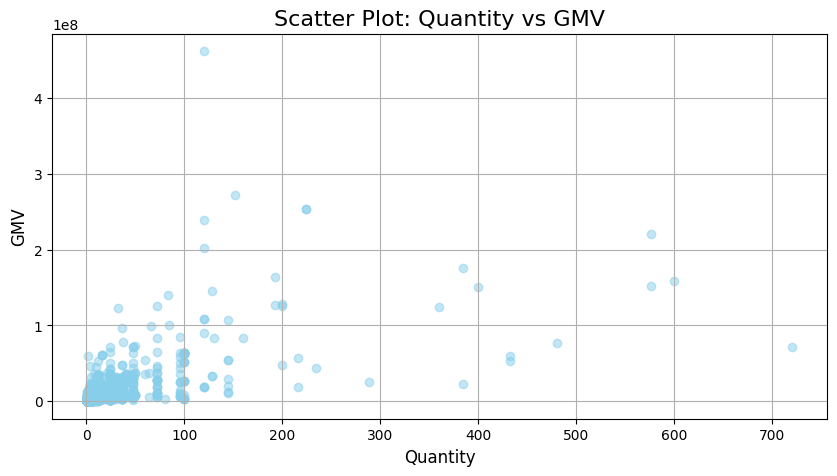

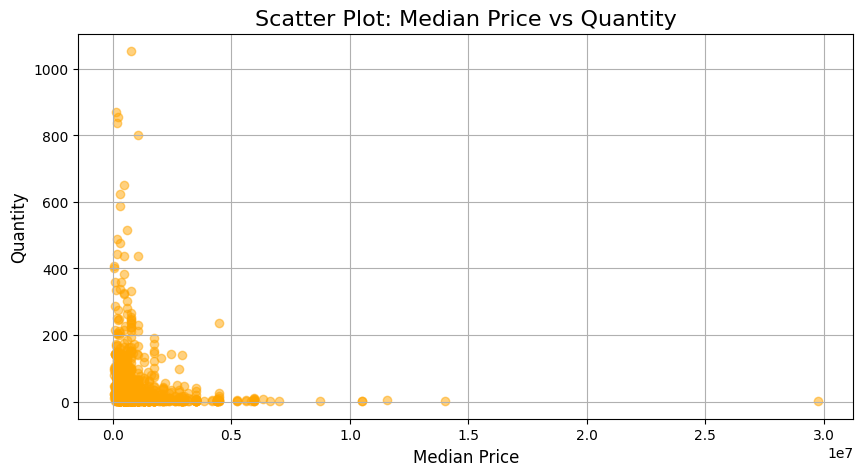

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Memuat dataset
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
data = pd.read_csv(url)

# Menghitung GMV (Gross Merchandise Value) untuk setiap product_id
data['GMV'] = data['quantity'] * data['item_price']

# Membuat scatter plot quantity vs GMV
plt.figure(figsize=(10, 5))
plt.scatter(data['quantity'], data['GMV'], color='skyblue', alpha=0.5)
plt.title('Scatter Plot: Quantity vs GMV', fontsize=16)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('GMV', fontsize=12)
plt.grid(True)
plt.show()

# Menghitung median harga per product_id
median_price = data.groupby('product_id')['item_price'].median()

# Membuat scatter plot median harga vs quantity
plt.figure(figsize=(10, 5))
plt.scatter(median_price, data.groupby('product_id')['quantity'].sum(), color='orange', alpha=0.5)
plt.title('Scatter Plot: Median Price vs Quantity', fontsize=16)
plt.xlabel('Median Price', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.grid(True)
plt.show()
